In [21]:
%load_ext autoreload
%autoreload 2

Preprocessing
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import sys

sys.path.append("../")

import sys
import torch
from data import datasets
from training import trainer
from modules import ind_generator

import datetime
import plots, utilities
from IPython.display import Image, display, Markdown

In [23]:
dataset = datasets.CharSMILESChEMBLIndications()

In [24]:
dataset.all_data

,canonical_smiles,mesh_heading_Acne Vulgaris,mesh_heading_Alzheimer Disease,mesh_heading_Anemia,mesh_heading_Anxiety,"mesh_heading_Arthritis, Rheumatoid",mesh_heading_Asthma,mesh_heading_Atrial Fibrillation,mesh_heading_Bacterial Infections,mesh_heading_Bipolar Disorder,...,mesh_heading_Severe Acute Respiratory Syndrome,mesh_heading_Stomach Neoplasms,mesh_heading_Stroke,mesh_heading_Thrombosis,mesh_heading_Thyroid Neoplasms,mesh_heading_Tuberculosis,mesh_heading_Urinary Bladder Neoplasms,mesh_heading_Urinary Tract Infections,mesh_heading_Virus Diseases,mesh_heading_Other
0,CC(=O)O[C@H]1CC[C@@]2(C)C(=CC[C@@H]3[C@@H]2CC[...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,CC(=O)Nc1ccc(O)cc1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,CC(=O)Nc1ccc(O)cc1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41919,COc1ncc(-c2ccc(Cl)cc2)cc1[C@@H](c1ccccc1)[C@@]...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
41943,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41957,[O-][n+]1c(CO)c(CO)[n+]([O-])c2ccccc21,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
41959,N#Cc1ccc(N2N=C3c4ccc(C(=O)N5CCC(O)CC5)nc4CC[C@...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
len(dataset)

17464

In [26]:
dataset[0][1].shape

torch.Size([80])

In [29]:
model = ind_generator.SmilesIndGeneratorRNN(
    vocab_size=dataset.vocab_size,
    num_indications=dataset.num_indications,
    num_hiddens=256,
    num_layers=2,
    learning_rate = 1e-3,
    weight_decay = 1e-4,
    output_dropout=0.2,
    rnn_dropout=0.2,
)

In [30]:
model_trainer = trainer.Trainer(max_epochs=16, init_random=None, clip_grads_norm=1.0)
model_trainer.fit(model, dataset)

Epoch 1 completed in 11.94 seconds.16)
Epoch 1/16: Train Loss: 2.4972, Val Loss: 1.7958
Epoch 2 completed in 11.97 seconds.16)
Epoch 2/16: Train Loss: 1.4928, Val Loss: 1.3713
Epoch 3 completed in 12.05 seconds.16)
Epoch 3/16: Train Loss: 1.2739, Val Loss: 1.2176
Epoch 4 completed in 12.00 seconds.16)
Epoch 4/16: Train Loss: 1.1512, Val Loss: 1.1052
Epoch 5 completed in 12.03 seconds.16)
Epoch 5/16: Train Loss: 1.0571, Val Loss: 1.0292
Epoch 6 completed in 12.01 seconds.16)
Epoch 6/16: Train Loss: 0.9812, Val Loss: 0.9577
Epoch 7 completed in 11.93 seconds.16)
Epoch 7/16: Train Loss: 0.9108, Val Loss: 0.8892
Epoch 8 completed in 11.91 seconds.16)
Epoch 8/16: Train Loss: 0.8457, Val Loss: 0.8421
Epoch 9 completed in 11.95 seconds.16)
Epoch 9/16: Train Loss: 0.7915, Val Loss: 0.7835
Epoch 10 completed in 11.86 seconds.16)
Epoch 10/16: Train Loss: 0.7401, Val Loss: 0.7464
Epoch 11 completed in 11.99 seconds.16)
Epoch 11/16: Train Loss: 0.6925, Val Loss: 0.7136
Epoch 12 completed in 11.74 

In [31]:
test_batch = dataset[5]

In [32]:
test_batch[0].shape, test_batch[1].shape, test_batch[2].shape

(torch.Size([18, 51]), torch.Size([80]), torch.Size([18]))

In [33]:
output, _ = model(test_batch[0].unsqueeze(0).to(device=model_trainer.device), test_batch[1].unsqueeze(0).to(device=model_trainer.device))

In [34]:
print(f"Input SMILES: {''.join([dataset.idx_to_char[c] for c in test_batch[2].cpu().numpy()])}")
print(f"Prediction: {''.join([dataset.idx_to_char[c] for c in output.argmax(dim=-1).squeeze().cpu().numpy()])}")

Input SMILES: C(=O)Nc1ccc(O)cc1£
Prediction: C(=O)Oc1ccc(O)cc1£


In [35]:
# find where index == 1
print(torch.where(test_batch[1] == 1)[0])

tensor([54])


In [36]:
print(dataset.indications_names)

['mesh_heading_Acne Vulgaris', 'mesh_heading_Alzheimer Disease', 'mesh_heading_Anemia', 'mesh_heading_Anxiety', 'mesh_heading_Arthritis, Rheumatoid', 'mesh_heading_Asthma', 'mesh_heading_Atrial Fibrillation', 'mesh_heading_Bacterial Infections', 'mesh_heading_Bipolar Disorder', 'mesh_heading_Breast Neoplasms', 'mesh_heading_Carcinoma, Hepatocellular', 'mesh_heading_Carcinoma, Non-Small-Cell Lung', 'mesh_heading_Carcinoma, Renal Cell', 'mesh_heading_Cardiovascular Diseases', 'mesh_heading_Colorectal Neoplasms', 'mesh_heading_Constipation', 'mesh_heading_Coronary Disease', 'mesh_heading_Dementia', 'mesh_heading_Depressive Disorder', 'mesh_heading_Depressive Disorder, Major', 'mesh_heading_Diabetes Mellitus', 'mesh_heading_Diabetes Mellitus, Type 2', 'mesh_heading_Digestive System Diseases', 'mesh_heading_Epilepsy', 'mesh_heading_Graft vs Host Disease', 'mesh_heading_HIV Infections', 'mesh_heading_Head and Neck Neoplasms', 'mesh_heading_Heart Failure', 'mesh_heading_Hodgkin Disease', 'mes

In [60]:
def simple_generate(prefix, num_chars, model, indications_tensor, char_to_idx_mapping, idx_to_char_mapping, temperature = 0.0, device=None):
    """
    Simple character-by-character generation function.
    """

    def decode_indices_to_string(encoded_indices: list, idx_to_char_mapping: dict[int, str]):
        decoded = ''.join([idx_to_char_mapping[int(inx)] for inx in encoded_indices])
        return decoded

    def encode_string_to_indices(smiles_string: str, char_to_idx_mapping: dict[str, int]):
        encoded = [char_to_idx_mapping[c] for c in smiles_string]
        return encoded

    model.eval()
    generated = prefix

    # Initialize state with indications
    state = model.init_state(indications_tensor.unsqueeze(0).to(device))  # Add batch dim
    
    with torch.no_grad():
        # First, process the prefix to get the proper state
        if len(prefix) > 0:
            prefix_encoded = encode_string_to_indices(prefix, char_to_idx_mapping)
            prefix_tensor = torch.nn.functional.one_hot(
                torch.tensor(prefix_encoded), 
                num_classes=len(char_to_idx_mapping)
            ).float().to(device)
            
            # Process prefix through model to get proper state
            _, state = model(prefix_tensor.unsqueeze(0), state=state)
        
        # Now generate new characters one by one
        for i in range(num_chars - len(prefix)):
            # For generation, we need to feed the last character (or a dummy if this is the first step)
            if len(generated) > 0:
                last_char = generated[-1]
                last_char_idx = char_to_idx_mapping[last_char]
            else:
                # If no prefix, start with some default (this shouldn't happen with your use case)
                last_char_idx = 0
            
            # Create one-hot encoding for single character
            char_tensor = torch.nn.functional.one_hot(
                torch.tensor([last_char_idx]), 
                num_classes=len(char_to_idx_mapping)
            ).float().to(device)
            
            # Get prediction for next character
            output, state = model(char_tensor.unsqueeze(0), state=state)  # Add batch dim
            
            # Get most likely next token
            if temperature > 0:
                # Apply temperature scaling
                output = output / temperature
                probabilities = torch.softmax(output, dim=-1)
                next_token = torch.multinomial(probabilities[0, -1, :], num_samples=1).item()
            else:
                # Default to argmax if temperature is 0
                next_token = output[0, -1, :].argmax().item()
            
            # Decode and append
            next_char = decode_indices_to_string([next_token], idx_to_char_mapping)

            if next_char == '£' or next_char == '': # EOS token
            # if next_char == ' ' or next_char == '': # EOS token
                break

            generated += next_char
            
            # print(f"Step {i+1}: Added '{next_char}' -> '{generated}'")
            
    return generated

In [61]:
for name in dataset.indications_names:
    print(name)

mesh_heading_Acne Vulgaris
mesh_heading_Alzheimer Disease
mesh_heading_Anemia
mesh_heading_Anxiety
mesh_heading_Arthritis, Rheumatoid
mesh_heading_Asthma
mesh_heading_Atrial Fibrillation
mesh_heading_Bacterial Infections
mesh_heading_Bipolar Disorder
mesh_heading_Breast Neoplasms
mesh_heading_Carcinoma, Hepatocellular
mesh_heading_Carcinoma, Non-Small-Cell Lung
mesh_heading_Carcinoma, Renal Cell
mesh_heading_Cardiovascular Diseases
mesh_heading_Colorectal Neoplasms
mesh_heading_Constipation
mesh_heading_Coronary Disease
mesh_heading_Dementia
mesh_heading_Depressive Disorder
mesh_heading_Depressive Disorder, Major
mesh_heading_Diabetes Mellitus
mesh_heading_Diabetes Mellitus, Type 2
mesh_heading_Digestive System Diseases
mesh_heading_Epilepsy
mesh_heading_Graft vs Host Disease
mesh_heading_HIV Infections
mesh_heading_Head and Neck Neoplasms
mesh_heading_Heart Failure
mesh_heading_Hodgkin Disease
mesh_heading_Hypercholesterolemia
mesh_heading_Hypersensitivity
mesh_heading_Hypertension
me

# Lets generate some  Medications

In [83]:
n_chars = 100

n_valid = 0
n_invalid = 0
images = []
outputs = []
for i in range(50):
    output = simple_generate(
        prefix="",
        indications_tensor = dataset.get_indications_tensor(dataset.indications_names[i]).to(model_trainer.device),
        num_chars=500,
        model=model,
        char_to_idx_mapping=dataset.char_to_idx,
        idx_to_char_mapping=dataset.idx_to_char,
        temperature=0.0,
        device=model_trainer.device
    ) 

    outputs.append(output)
    print(f"Requested up to {n_chars} characters, got: {len(output)}")
    print(f"Molecule Canonical SMILES: {output}")

    valid = utilities.validate_smiles_string(output)

    if not valid:
        n_invalid += 1
        print("Generated SMILES is not valid.")
    else:
        n_valid += 1
        print("Generated SMILES is valid.")
        images.append(utilities.draw_molecule(output))

Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 17
Molecule Canonical SMILES: C(=O)Nc1ccc(O)cc1
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characte

Requested up to 100 characters, got: 159
Molecule Canonical SMILES: C(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 16
Molecule Canonical SMILES: =C(N)c1ccc(O)cc1
Generated SMILES is not valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 12
Molecule Canonical SMILES: C(C)CCC(=O)O
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Request

[13:13:57] SMILES Parse Error: syntax error while parsing: =C(N)c1ccc(O)cc1
[13:13:57] SMILES Parse Error: check for mistakes around position 1:
[13:13:57] =C(N)c1ccc(O)cc1
[13:13:57] ^
[13:13:57] SMILES Parse Error: Failed parsing SMILES '=C(N)c1ccc(O)cc1' for input: '=C(N)c1ccc(O)cc1'


Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 81
Molecule Canonical SMILES: C(C)C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C

[13:13:58] SMILES Parse Error: syntax error while parsing: =C(O)c1ccccc1O
[13:13:58] SMILES Parse Error: check for mistakes around position 1:
[13:13:58] =C(O)c1ccccc1O
[13:13:58] ^
[13:13:58] SMILES Parse Error: Failed parsing SMILES '=C(O)c1ccccc1O' for input: '=C(O)c1ccccc1O'
[13:13:58] SMILES Parse Error: syntax error while parsing: =C(O)c1cc(C2CCN2CCCC2)cc1
[13:13:58] SMILES Parse Error: check for mistakes around position 1:
[13:13:58] =C(O)c1cc(C2CCN2CCCC2)cc1
[13:13:58] ^
[13:13:58] SMILES Parse Error: Failed parsing SMILES '=C(O)c1cc(C2CCN2CCCC2)cc1' for input: '=C(O)c1cc(C2CCN2CCCC2)cc1'


Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 12
Molecule Canonical SMILES: C(C)CCC(=O)O
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.
Requested up to 100 characters, g

[13:13:58] SMILES Parse Error: syntax error while parsing: =C(O)c1ccccc1O
[13:13:58] SMILES Parse Error: check for mistakes around position 1:
[13:13:58] =C(O)c1ccccc1O
[13:13:58] ^
[13:13:58] SMILES Parse Error: Failed parsing SMILES '=C(O)c1ccccc1O' for input: '=C(O)c1ccccc1O'
[13:13:58] SMILES Parse Error: syntax error while parsing: =C([O-])CC(=O)O.[Na+].[Na+]
[13:13:58] SMILES Parse Error: check for mistakes around position 1:
[13:13:58] =C([O-])CC(=O)O.[Na+].[Na+]
[13:13:58] ^
[13:13:58] SMILES Parse Error: Failed parsing SMILES '=C([O-])CC(=O)O.[Na+].[Na+]' for input: '=C([O-])CC(=O)O.[Na+].[Na+]'
[13:13:58] SMILES Parse Error: syntax error while parsing: =C([O-])[C@H]1OC(=O)[C@H](O)[C@@H](O)[C@@H]1O[C@H]1C[C@H](O)[C@H](O)[C@H]1O)[C@H](C)O)[C@@H](O)[C@H](O)[C@H]1O
[13:13:58] SMILES Parse Error: check for mistakes around position 1:
[13:13:58] =C([O-])[C@H]1OC(=O)[C@H](O)[C@@H](O)[C@@
[13:13:58] ^
[13:13:58] SMILES Parse Error: Failed parsing SMILES '=C([O-])[C@H]1OC(=O)[C@H](O)[

Requested up to 100 characters, got: 77
Molecule Canonical SMILES: C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C
Generated SMILES is valid.


# Generated 44 valid molecules and 6 invalid SMILES strings out of 5 attempts.

## Generated Molecules

### Indication - mesh_heading_Acne Vulgaris

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

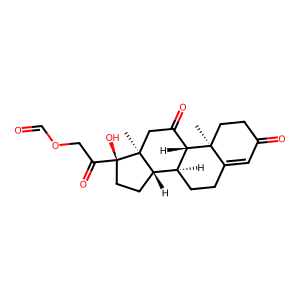

### Indication - mesh_heading_Alzheimer Disease

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

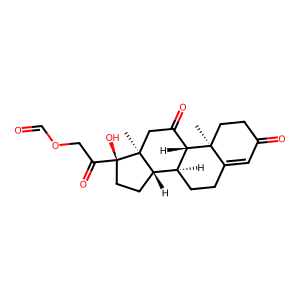

### Indication - mesh_heading_Anemia

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

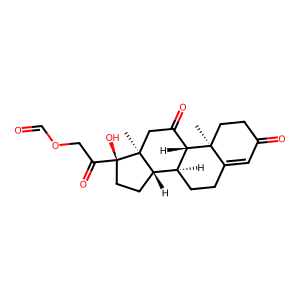

### Indication - mesh_heading_Anxiety

**SMILES:** C(=O)Nc1ccc(O)cc1

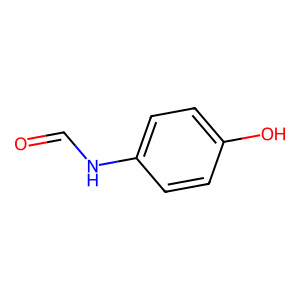

### Indication - mesh_heading_Arthritis, Rheumatoid

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

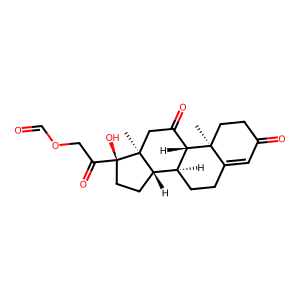

### Indication - mesh_heading_Asthma

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

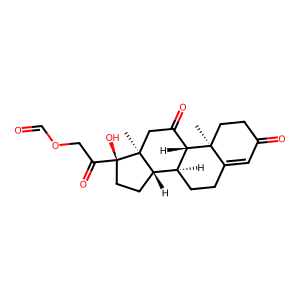

### Indication - mesh_heading_Atrial Fibrillation

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

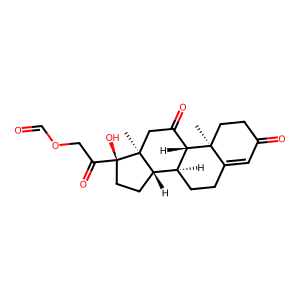

### Indication - mesh_heading_Bacterial Infections

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

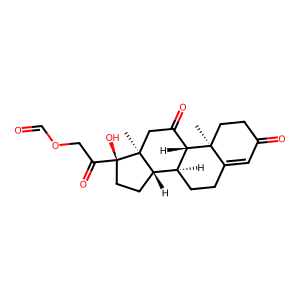

### Indication - mesh_heading_Bipolar Disorder

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

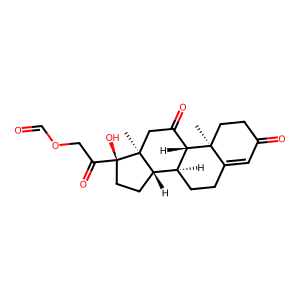

### Indication - mesh_heading_Breast Neoplasms

**SMILES:** C(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c3ccccc3)[C@]3(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c4ccccc4)c4ccccc4)C(C)=C1C3(C)C)[C@]1(OC(C)=O)CO[C@@H]1C[C@@H]2O

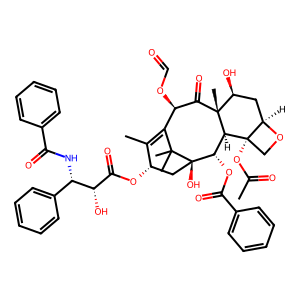

### Indication - mesh_heading_Carcinoma, Hepatocellular

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

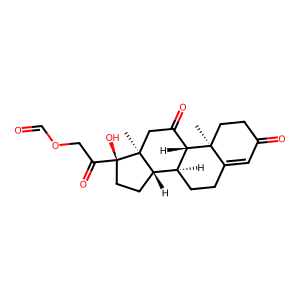

### Indication - mesh_heading_Carcinoma, Non-Small-Cell Lung

**SMILES:** =C(N)c1ccc(O)cc1

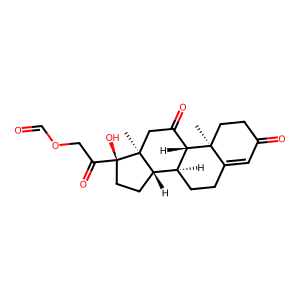

### Indication - mesh_heading_Carcinoma, Renal Cell

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

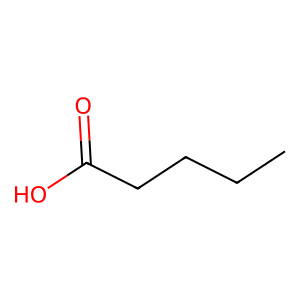

### Indication - mesh_heading_Cardiovascular Diseases

**SMILES:** C(C)CCC(=O)O

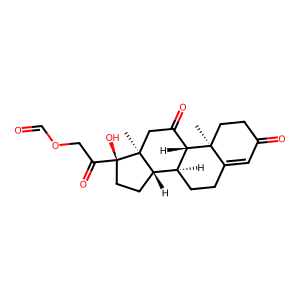

### Indication - mesh_heading_Colorectal Neoplasms

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

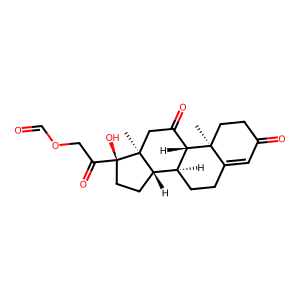

### Indication - mesh_heading_Constipation

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

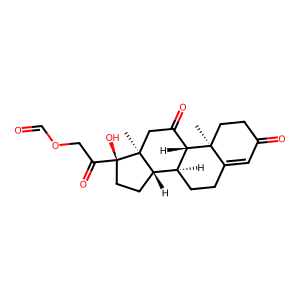

### Indication - mesh_heading_Coronary Disease

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

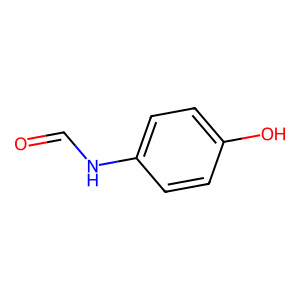

### Indication - mesh_heading_Dementia

**SMILES:** C(=O)Nc1ccc(O)cc1

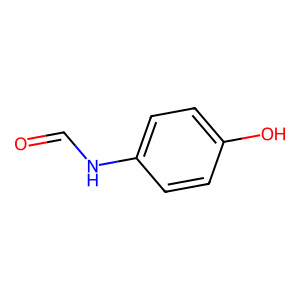

### Indication - mesh_heading_Depressive Disorder

**SMILES:** C(=O)Nc1ccc(O)cc1

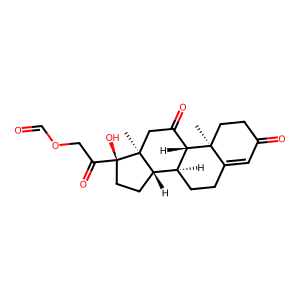

### Indication - mesh_heading_Depressive Disorder, Major

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

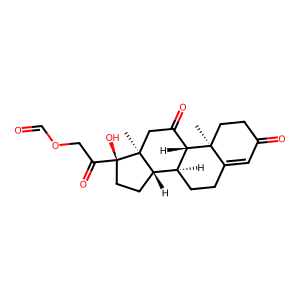

### Indication - mesh_heading_Diabetes Mellitus

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

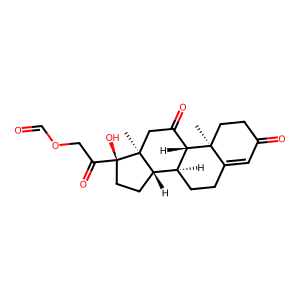

### Indication - mesh_heading_Diabetes Mellitus, Type 2

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

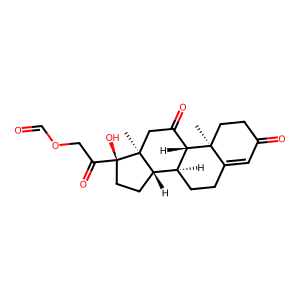

### Indication - mesh_heading_Digestive System Diseases

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

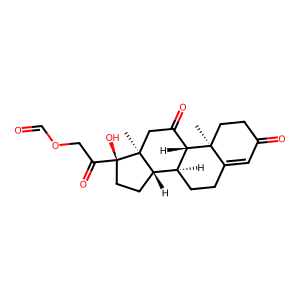

### Indication - mesh_heading_Epilepsy

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

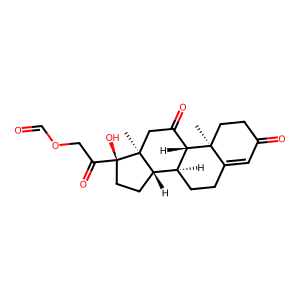

### Indication - mesh_heading_Graft vs Host Disease

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

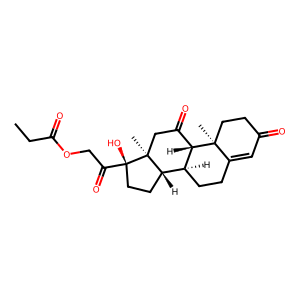

### Indication - mesh_heading_HIV Infections

**SMILES:** C(C)C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

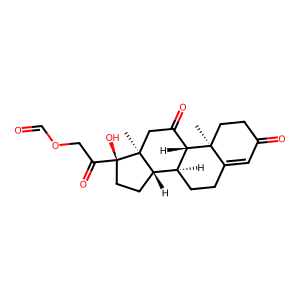

### Indication - mesh_heading_Head and Neck Neoplasms

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

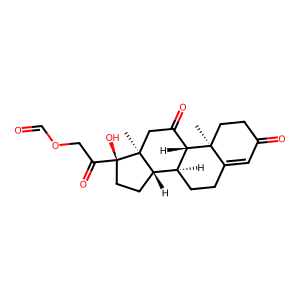

### Indication - mesh_heading_Heart Failure

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

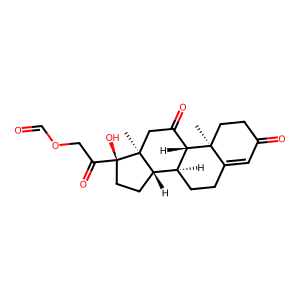

### Indication - mesh_heading_Hodgkin Disease

**SMILES:** =C(O)c1ccccc1O

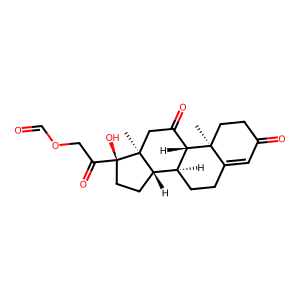

### Indication - mesh_heading_Hypercholesterolemia

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

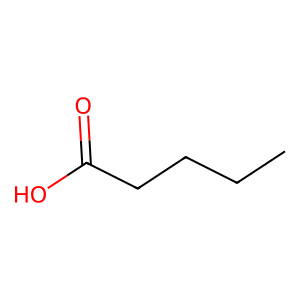

### Indication - mesh_heading_Hypersensitivity

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

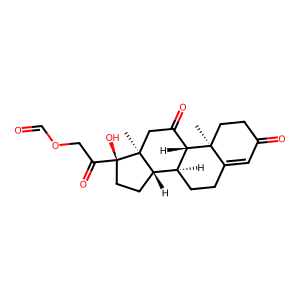

### Indication - mesh_heading_Hypertension

**SMILES:** C(C)CCC(=O)O

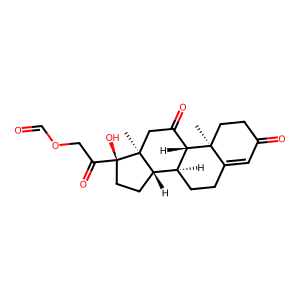

### Indication - mesh_heading_Hypertension, Pulmonary

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

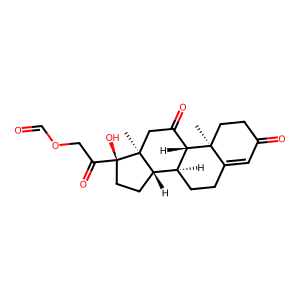

### Indication - mesh_heading_Infections

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

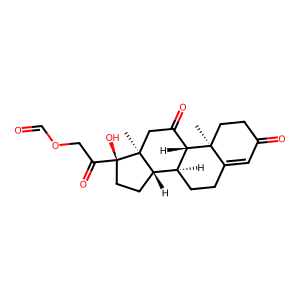

### Indication - mesh_heading_Inflammation

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

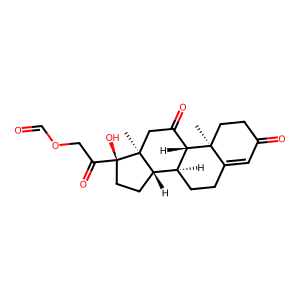

### Indication - mesh_heading_Influenza, Human

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

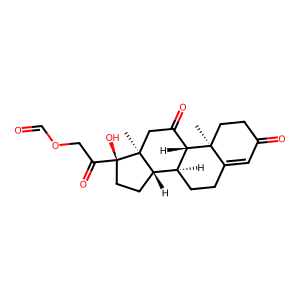

### Indication - mesh_heading_Leukemia

**SMILES:** =C(O)c1cc(C2CCN2CCCC2)cc1

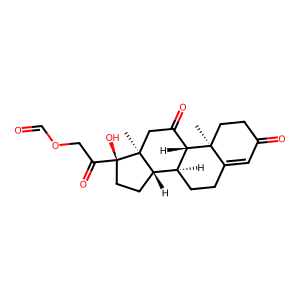

### Indication - mesh_heading_Leukemia, Myeloid, Acute

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

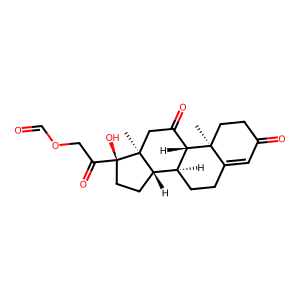

### Indication - mesh_heading_Lung Diseases, Obstructive

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

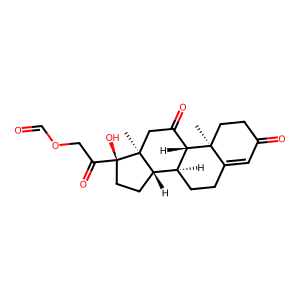

### Indication - mesh_heading_Lung Neoplasms

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

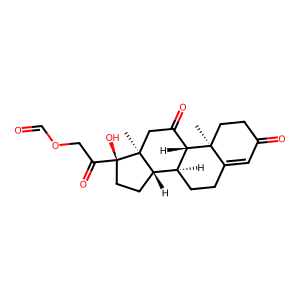

### Indication - mesh_heading_Lymphoma

**SMILES:** =C(O)c1ccccc1O

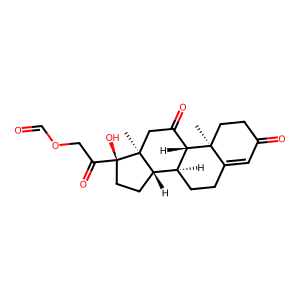

### Indication - mesh_heading_Lymphoma, Follicular

**SMILES:** =C([O-])CC(=O)O.[Na+].[Na+]

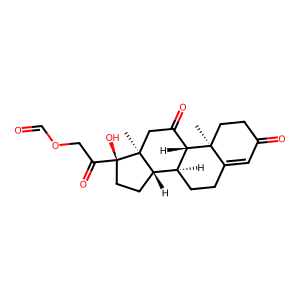

### Indication - mesh_heading_Lymphoma, Non-Hodgkin

**SMILES:** =C([O-])[C@H]1OC(=O)[C@H](O)[C@@H](O)[C@@H]1O[C@H]1C[C@H](O)[C@H](O)[C@H]1O)[C@H](C)O)[C@@H](O)[C@H](O)[C@H]1O

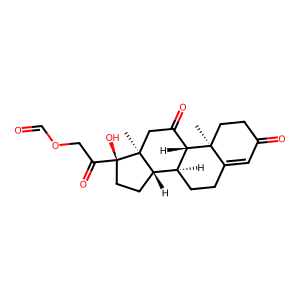

### Indication - mesh_heading_Malaria

**SMILES:** C(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C

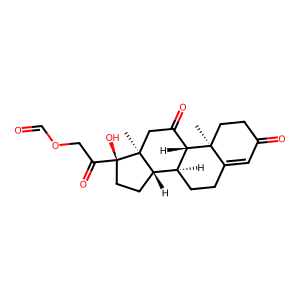

In [85]:
display(Markdown(f"# Generated {n_valid} valid molecules and {n_invalid} invalid SMILES strings out of 5 attempts."))
display(Markdown("## Generated Molecules"))
for i, img in enumerate(images):
    display(Markdown(f"### Indication - {dataset.indications_names[i]}"))
    display(Markdown(f"**SMILES:** {outputs[i]}"))

    display(img)